In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\user\Downloads\Wine_clust.csv")

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


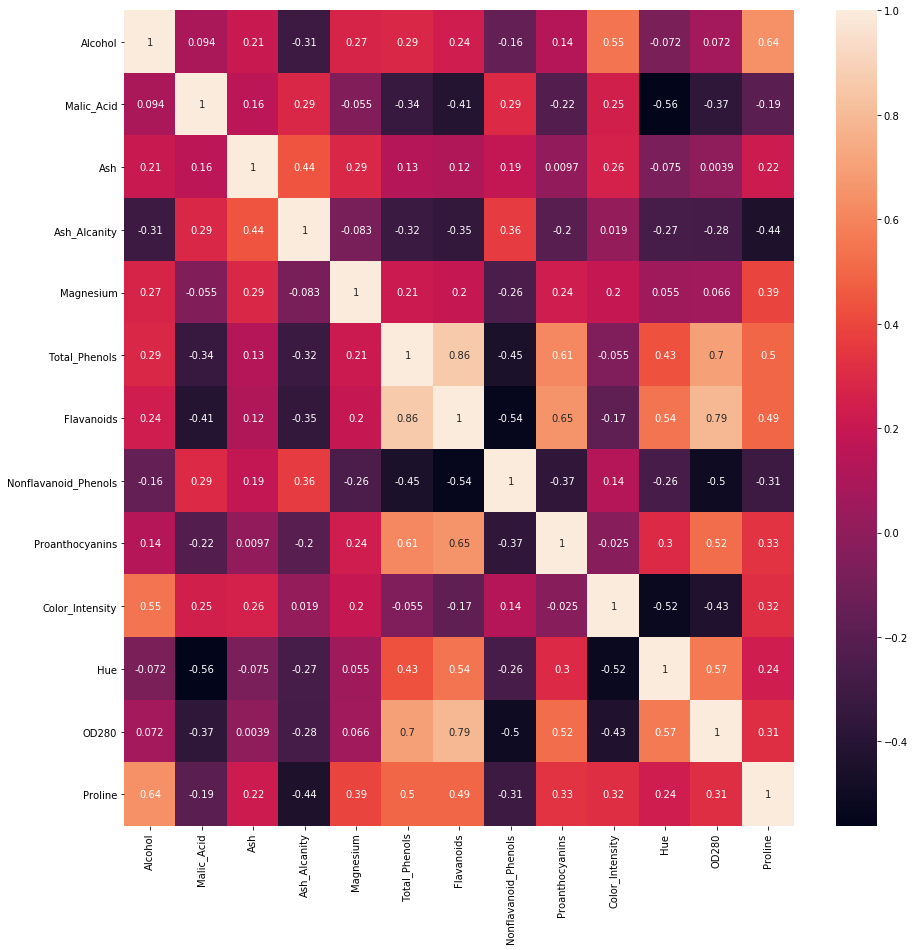

In [7]:
plt.figure(figsize=(15,15))
p=sns.heatmap(data.corr(), annot=True)
plt.show()

## Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
stdscaling = StandardScaler()
data_std = stdscaling.fit_transform(data)
data_std = pd.DataFrame(data_std)

In [9]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaling = MinMaxScaler()
minmax_scale = minmax_scaling.fit(data_std)
data_minmax = minmax_scale.transform(data_std)
print("feature scaling:",pd.DataFrame(data_minmax).head())

feature scaling:           0         1         2         3         4         5         6  \
0  0.842105  0.191700  0.572193  0.257732  0.619565  0.627586  0.573840   
1  0.571053  0.205534  0.417112  0.030928  0.326087  0.575862  0.510549   
2  0.560526  0.320158  0.700535  0.412371  0.336957  0.627586  0.611814   
3  0.878947  0.239130  0.609626  0.319588  0.467391  0.989655  0.664557   
4  0.581579  0.365613  0.807487  0.536082  0.521739  0.627586  0.495781   

          7         8         9        10        11        12  
0  0.283019  0.593060  0.372014  0.455285  0.970696  0.561341  
1  0.245283  0.274448  0.264505  0.463415  0.780220  0.550642  
2  0.320755  0.757098  0.375427  0.447154  0.695971  0.646933  
3  0.207547  0.558360  0.556314  0.308943  0.798535  0.857347  
4  0.490566  0.444795  0.259386  0.455285  0.608059  0.325963  


## K-means clustering

In [10]:
from sklearn.cluster import KMeans

In [11]:
wcss =[]
for i in range(1,13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(data_minmax)
    wcss.append(kmeans.inertia_)

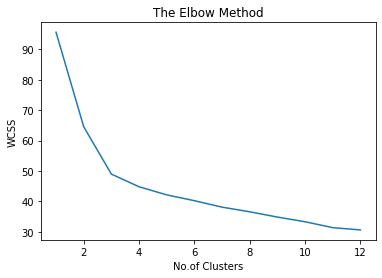

In [12]:
plt.plot(range(1,13),wcss)
plt.title('The Elbow Method')
plt.xlabel('No.of Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
# Optimal number of clusters =3

In [14]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data_minmax)

In [15]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [16]:
len(y_kmeans)

178

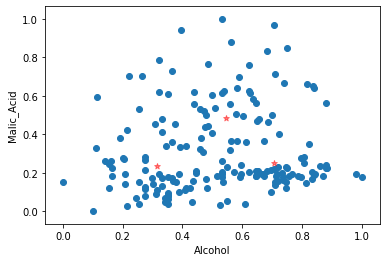

In [17]:
plt.scatter(data_minmax[:,0], data_minmax[:,1])
centers = kmeans.cluster_centers_
labels = kmeans.labels_
plt.scatter(centers[:,0], centers[:,1], c='red', marker='*',alpha=0.5)
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.show()

## PCA

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 2 2 2 2 2 2 0 2 0 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


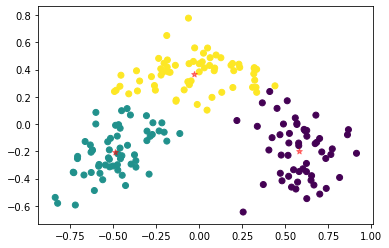

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(data_minmax)
data_PCA = pca.transform(data_minmax)
kmeans.fit(data_PCA)
label_pca = kmeans.fit_predict(data_PCA)
print(label_pca)
plt.scatter(data_PCA[:,0], data_PCA[:,1], c=label_pca)
centers_PCA = kmeans.cluster_centers_
plt.scatter(centers_PCA[:,0], centers_PCA[:,1], c='red', marker='*',alpha=0.5)
plt.show()

In [19]:
km = KMeans(3)
km.fit(data_minmax)
km_pca = KMeans(3)
km_pca.fit(data_PCA)
print("k-means\tinertia: {}\n \tinertia: {}".format(km.inertia_,km_pca.inertia_))

k-means	inertia: 48.960517136676486
 	inertia: 45.66876503094323


## DB Scan

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0 -1  1  1  0  0  0  0 -1  0  1 -1 -1 -1
 -1 -1  0  0  0 -1 -1 -1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0 -1
 -1  0  0 -1  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0 -1  0  0  1  0
  0 -1 -1 -1 -1  0  0 -1  0  0  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1]


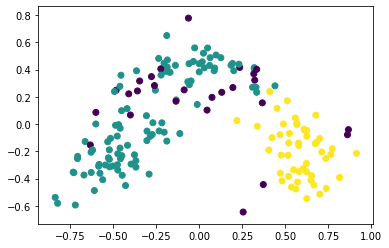

In [20]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.45,min_samples=3) 
label_dbs = dbscan.fit_predict(data_PCA)
print(label_dbs)
plt.scatter(data_PCA[:,0], data_PCA[:,1], c=label_dbs)
plt.show()